# 1. The Nobel Prizes
The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

In [1]:
#required libraries
import pandas as pd
import seaborn as sns
import numpy as np
#load dataset
nobel=pd.read_csv('nobel.csv')
#preview of the first few lines of data
nobel.head(n=10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


# 2. Who recives the Nobel Prize?
As we scroll through first few nobel laureates we find a Superstar of Physics, Wilhelm Conrad Rontgen : The guy who discovered X-rays and changed millions of life.And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?
We use their Country of Birth to represent there Nationality.

In [2]:
display('Total No. of Noble Prize Winners(until 2016):',
        len(nobel))
display(nobel['sex'].value_counts())
display('Ten Most Represented Countries at The Nobel Prize:',nobel['birth_country'].value_counts().head(n=10))

'Total No. of Noble Prize Winners(until 2016):'

911

Male      836
Female     49
Name: sex, dtype: int64

'Ten Most Represented Countries at The Nobel Prize:'

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

# 3. American Dominance
The most common winner of the Nobel Prize is a Man from America. We saw the dominance of european countires in the first few years of the price. When did the USA start to dominate the Nobel Prize charts?

In [3]:
nobel['USA_born_winners']=nobel['birth_country']=="United States of America"
nobel['Decade']=(np.floor(nobel['year']/10)*10).astype(int)
prop_usa_winners=nobel.groupby("Decade",as_index=False)['USA_born_winners'].mean()
prop_usa_winners

,Decade,USA_born_winners
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


# 4.USA Dominance, Visualized
A plot to visualize the time-period of American dominance. 

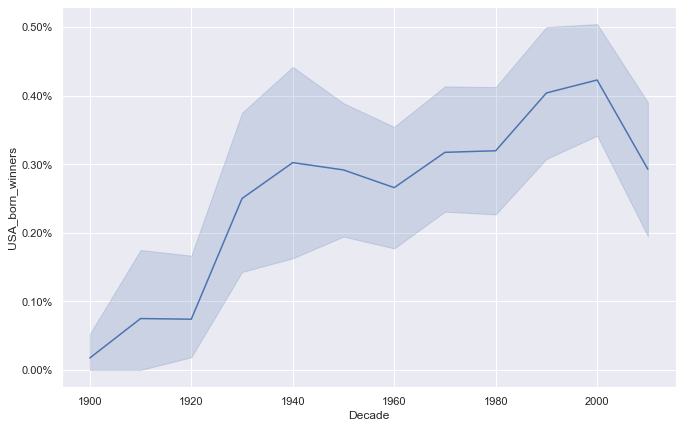

In [9]:
#setting thr plotting theme
sns.set()
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [11, 7]
# Plotting USA born winners 
ax = sns.lineplot(x=nobel["Decade"], y=nobel["USA_born_winners"])

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

# 5.What is the gender of a typical Nobel Prize Winners?
The American Dominance starts in the 1930s and they have been leading the way ever since.
But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?


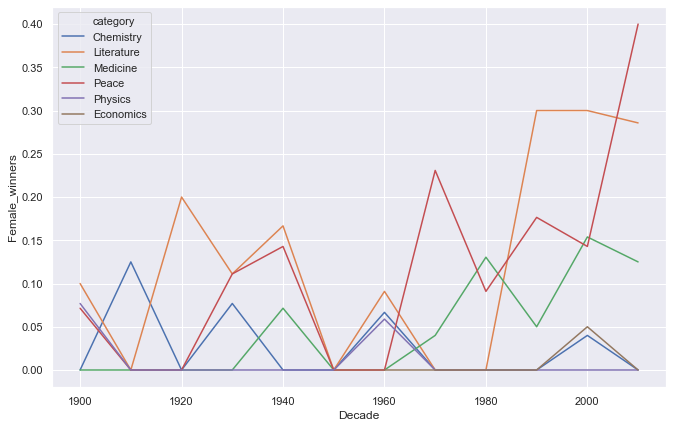

In [10]:
nobel['Female_winners']=nobel['sex']=="Female"
prop_female_winners=nobel.groupby(['Decade',"category"],as_index=False)['Female_winners'].mean()
# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x="Decade", y="Female_winners", hue="category", data=prop_female_winners)

# 6.The First Woman to win the Prize
The plots keep over plotting for Physics,Chemistry,Economics.The most women winners have been in the Peace and Literature categories.Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s.
Given the imbalance,who was the first woman to receive a Nobel Prize? And in what category?

In [11]:
f1=nobel[nobel["sex"] == "Female"]
f1.nsmallest(1,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winners,Decade,Female_winners,age
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,36.0


It is the Legendary Physicist and Chemist Marie Curie.

# 7. Repeat laureates
For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these talented few?

In [12]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby("full_name").filter(lambda x: len(x) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winners,Decade,Female_winners,age
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,36.0
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True,44.0
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False,NaN
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False,53.0
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False,NaN
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False,48.0
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False,40.0
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False,61.0
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False,NaN


# 8.Average age of a prize winner.
The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.
But what is the average age to win it?

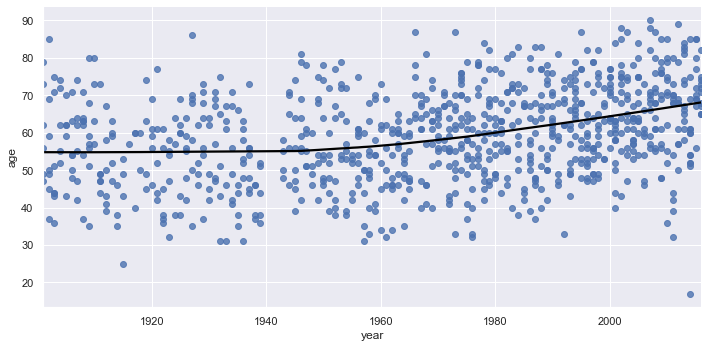

In [8]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel["birth_date"])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel["year"] - nobel["birth_date"].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x="year", y="age", data=nobel, lowess=True, aspect=2, line_kws={"color" : "black"})

# 9. Age differences between prize categories¶
The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let's look at age trends within different prize categories.

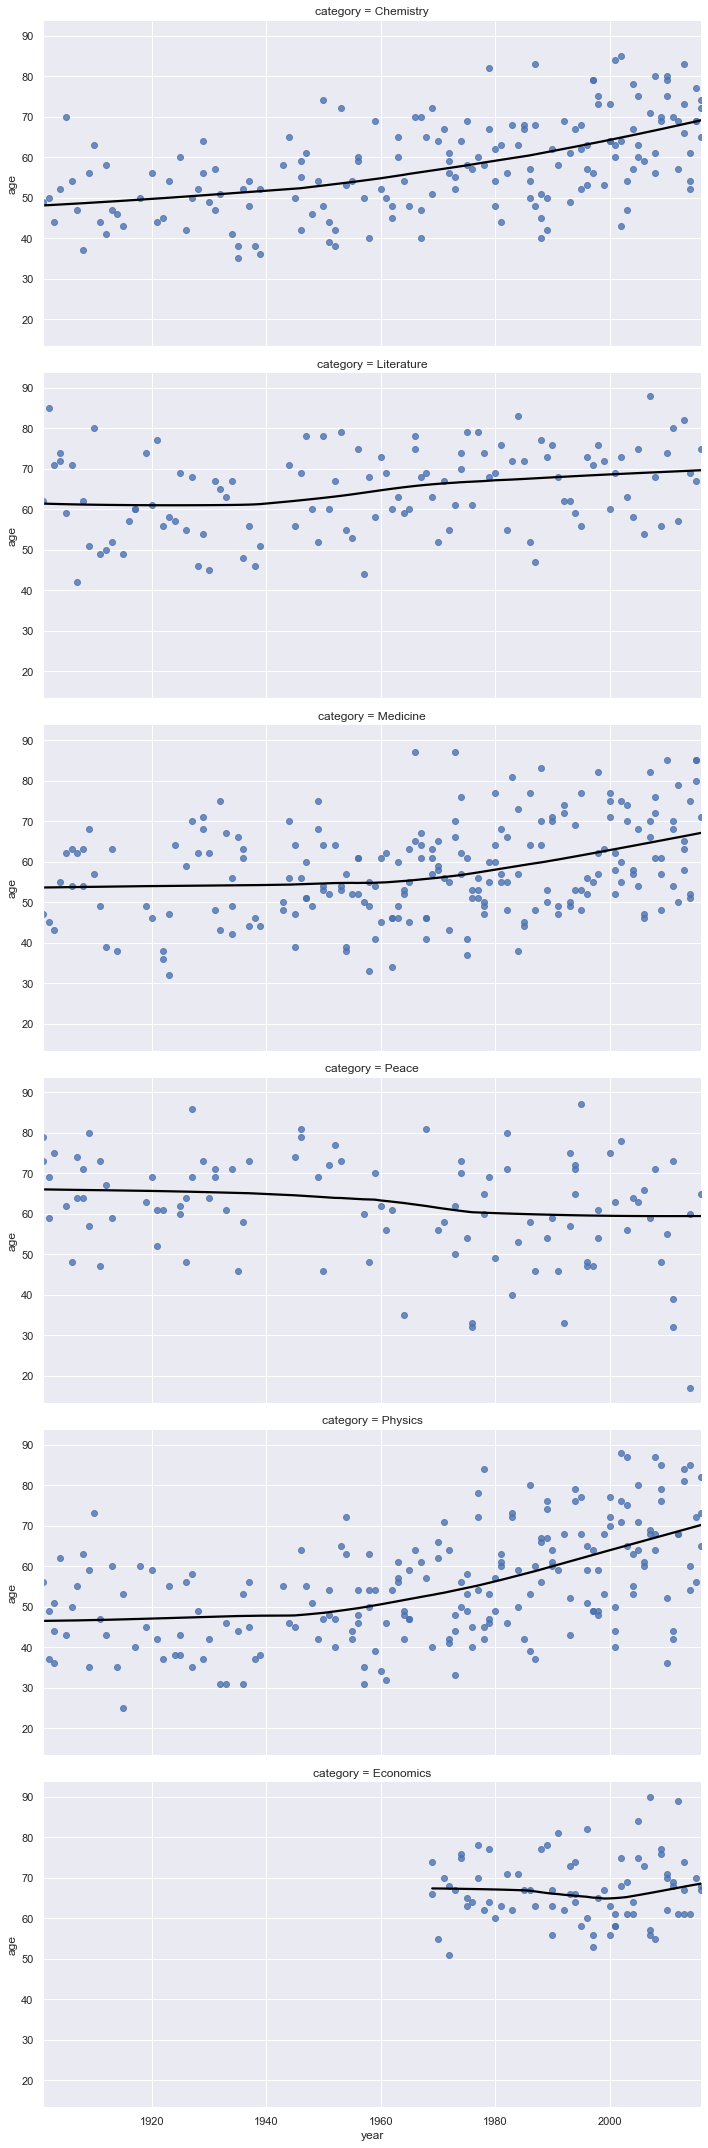

In [13]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x="year", y="age", data=nobel, row="category", lowess=True, aspect=2, line_kws={"color" : "black"})

# 10. Oldest and youngest winners¶
More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [14]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, "age"))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, "age")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winners,Decade,Female_winners,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winners,Decade,Female_winners,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


The oldest winner is Leonid Hurwicz winning at 90 and the youngest winner being Malala Yousafzai at 17.
